In [2]:
!pip install torchaudio librosa speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
import librosa
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_path = "/content/drive/MyDrive/data"
for accent in os.listdir(dataset_path):
    accent_path = os.path.join(dataset_path, accent)
    if os.path.isdir(accent_path):
        print(f"Accent: {accent}")
        for speaker in os.listdir(accent_path):
            speaker_path = os.path.join(accent_path, speaker)
            if os.path.isdir(speaker_path):
                files = [f for f in os.listdir(speaker_path) if f.endswith('.wav')]
                print(f"  Speaker: {speaker}, Files: {len(files)}")


Accent: indian
  Speaker: speaker_02, Files: 742
  Speaker: speaker_01, Files: 742
Accent: american
  Speaker: speaker_02, Files: 742
  Speaker: speaker_01, Files: 742


In [14]:
import torchaudio
import matplotlib.pyplot as plt

sample_audio_path = "/content/drive/MyDrive/data/american/speaker_01/american_s01_001.wav"


Sample Rate: 22050
Waveform Shape: torch.Size([1, 59535])


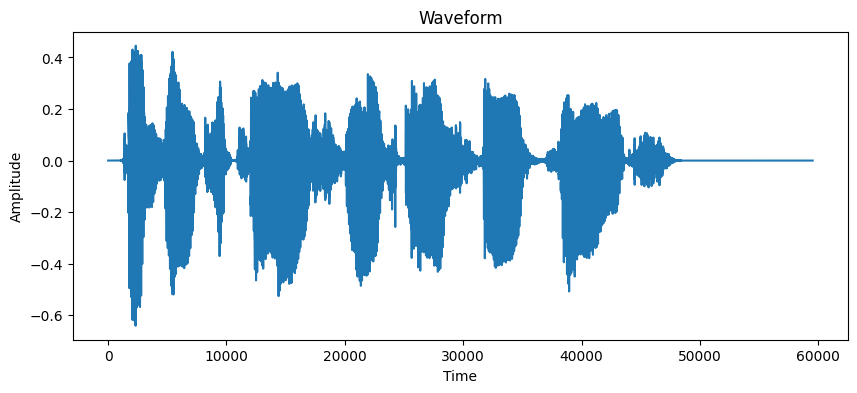

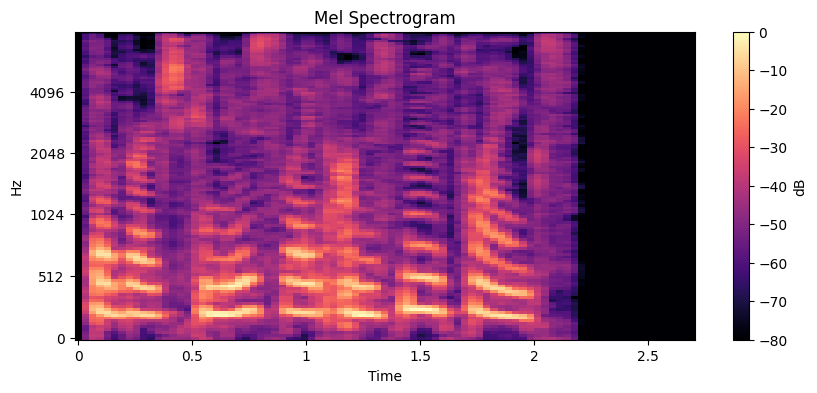

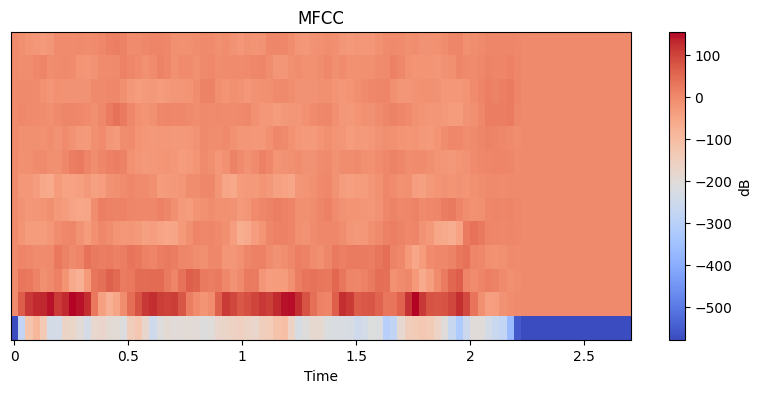

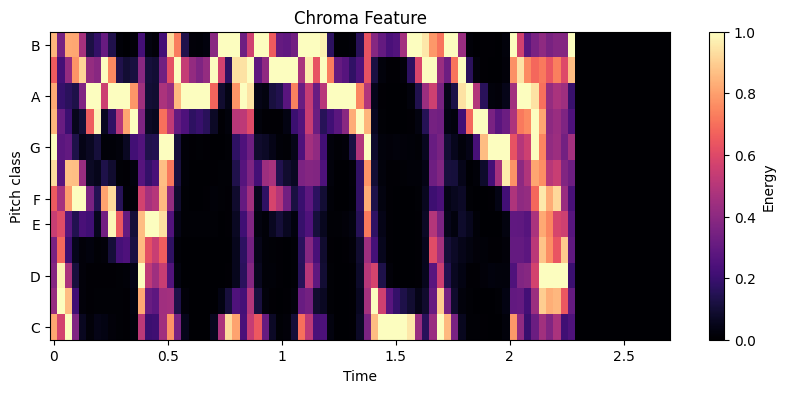

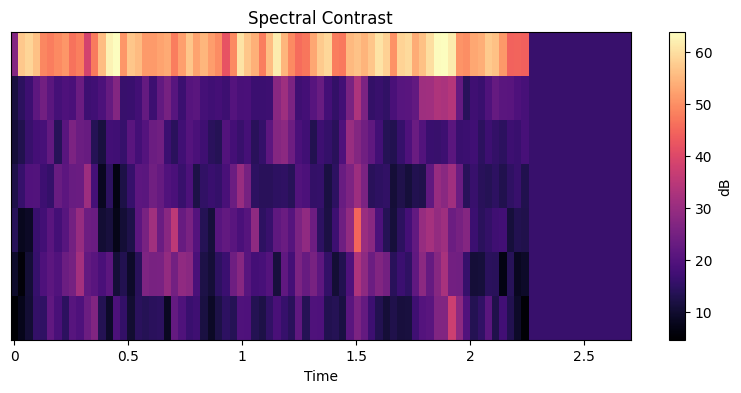

In [17]:
import librosa
import librosa.display
import numpy as np

def extract_mel_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db, sr

# Load sample
mel_spec, sr = extract_mel_spectrogram(sample_audio_path)

waveform, sample_rate = torchaudio.load(sample_audio_path)

print(f"Sample Rate: {sample_rate}")
print(f"Waveform Shape: {waveform.shape}")

plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


# Plot Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(label="dB")
plt.title("Mel Spectrogram")
plt.show()


#Plot MFCC
def plot_mfcc(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar(label="dB")
    plt.title("MFCC")
    plt.show()

plot_mfcc(sample_audio_path)


#Plot Chroma
def plot_chroma(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, x_axis="time", y_axis="chroma", sr=sr)
    plt.colorbar(label="Energy")
    plt.title("Chroma Feature")
    plt.show()

plot_chroma(sample_audio_path)


#Plot Spectral contrast
def plot_spectral_contrast(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(contrast, x_axis="time", sr=sr)
    plt.colorbar(label="dB")
    plt.title("Spectral Contrast")
    plt.show()

plot_spectral_contrast(sample_audio_path)



In [19]:
sample_audio_path = "/content/drive/MyDrive/data/indian/speaker_01/indian_s01_002.wav"

Sample Rate: 22050
Waveform Shape: torch.Size([1, 85995])


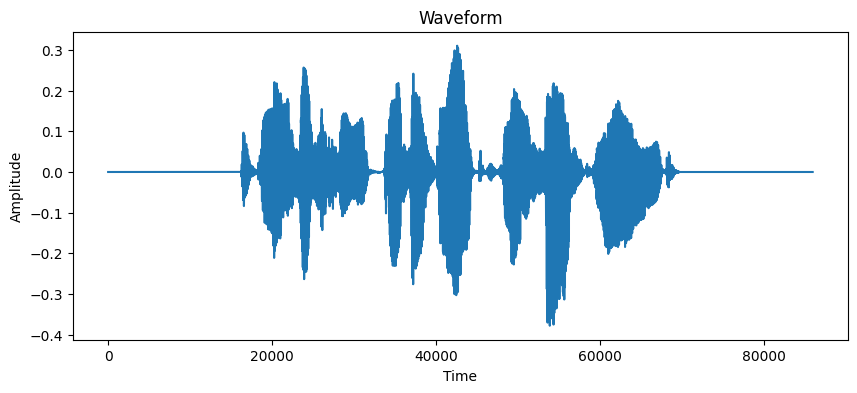

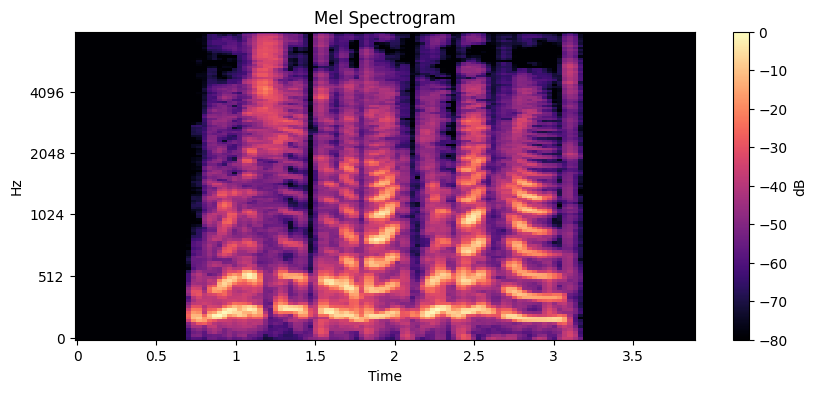

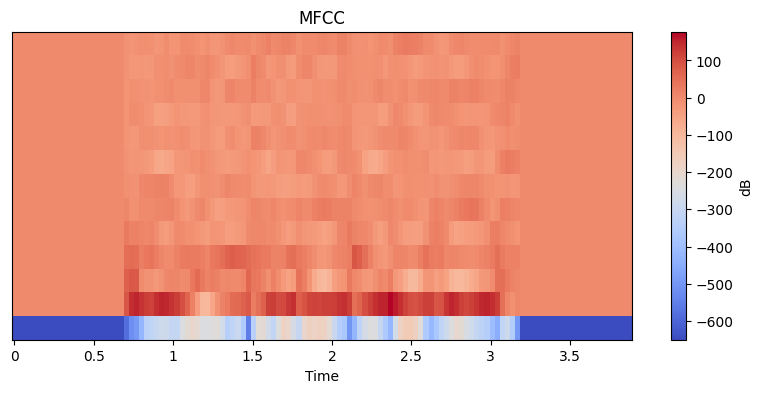

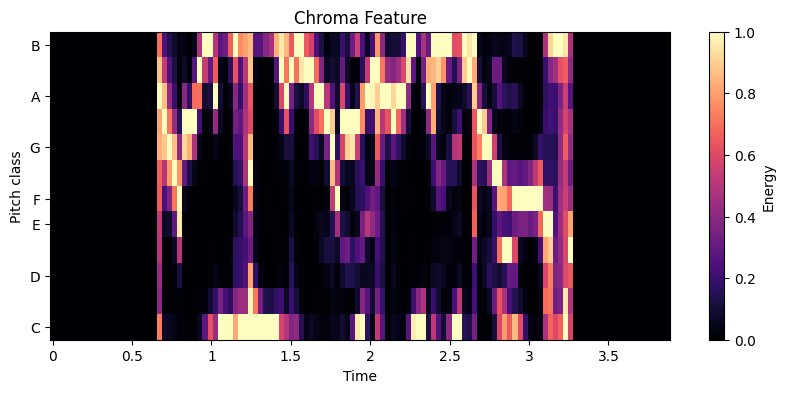

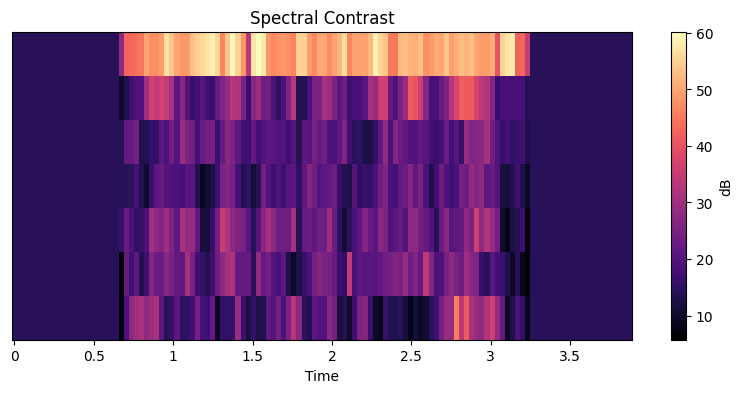

In [20]:
import librosa
import librosa.display
import numpy as np

def extract_mel_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db, sr

# Load sample
mel_spec, sr = extract_mel_spectrogram(sample_audio_path)

waveform, sample_rate = torchaudio.load(sample_audio_path)

print(f"Sample Rate: {sample_rate}")
print(f"Waveform Shape: {waveform.shape}")

plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


# Plot Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(label="dB")
plt.title("Mel Spectrogram")
plt.show()


#Plot MFCC
def plot_mfcc(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar(label="dB")
    plt.title("MFCC")
    plt.show()

plot_mfcc(sample_audio_path)


#Plot Chroma
def plot_chroma(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, x_axis="time", y_axis="chroma", sr=sr)
    plt.colorbar(label="Energy")
    plt.title("Chroma Feature")
    plt.show()

plot_chroma(sample_audio_path)


#Plot Spectral contrast
def plot_spectral_contrast(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(contrast, x_axis="time", sr=sr)
    plt.colorbar(label="dB")
    plt.title("Spectral Contrast")
    plt.show()

plot_spectral_contrast(sample_audio_path)

